In [1]:
from __future__ import print_function
import os 
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('DataFiles/chemical-concentration-readings.csv')

In [3]:
df

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [4]:
print('Shape of the dataset:',df.shape)

Shape of the dataset: (197, 2)


In [5]:
df.head(10)

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1
5,1975-01-01 10:00:00,16.9
6,1975-01-01 12:00:00,16.8
7,1975-01-01 14:00:00,17.4
8,1975-01-01 16:00:00,17.1
9,1975-01-01 18:00:00,17.0


In [8]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head(10)

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1
1975-01-01 10:00:00,1975-01-01 10:00:00,16.9
1975-01-01 12:00:00,1975-01-01 12:00:00,16.8
1975-01-01 14:00:00,1975-01-01 14:00:00,17.4
1975-01-01 16:00:00,1975-01-01 16:00:00,17.1


In [9]:
daily=df['Chemical conc.'].resample('D')
daily_mean=daily.mean()

Text(0,0.5,u'Chemical Concentration')

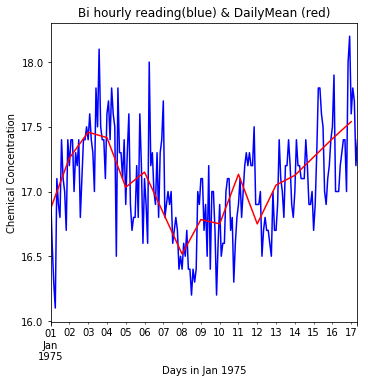

In [10]:
fig=plt.figure(figsize=(5.5,5.5))
ax=fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax,color='b')
daily_mean.plot(ax=ax,color='r')

ax.set_title('Bi hourly reading(blue) & DailyMean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical Concentration')


In [12]:
df = pd.read_csv('DataFiles/mean-daily-temperature-fisher-river.csv')
df.index=df['Date'].map(lambda d:pd.to_datetime(d,format= '%Y-%m-%d'))

In [14]:
print('Shape of dataframe',df.shape)

Shape of dataframe (1461, 2)


In [19]:
df.head(10)

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.00
1988-01-02,1988-01-02,-20.50
1988-01-03,1988-01-03,-22.00
1988-01-04,1988-01-04,-30.50
1988-01-05,1988-01-05,-31.00
1988-01-06,1988-01-06,-27.50
1988-01-07,1988-01-07,-26.25
1988-01-08,1988-01-08,-26.50
1988-01-09,1988-01-09,-23.00


Text(0.5,1,u'Mean daily temparature')

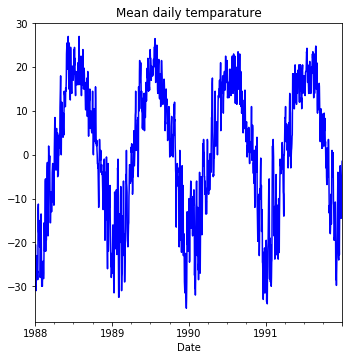

In [22]:
fig=plt.figure(figsize=(5.5,5.5))
ax=fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax,color='b')

ax.set_title('Mean daily temparature')



In [23]:
df['Month_Year']=df.index.map(lambda d:d.strftime('%m-%Y'))
df.head(10)

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.00,01-1988
1988-01-02,1988-01-02,-20.50,01-1988
1988-01-03,1988-01-03,-22.00,01-1988
1988-01-04,1988-01-04,-30.50,01-1988
1988-01-05,1988-01-05,-31.00,01-1988
1988-01-06,1988-01-06,-27.50,01-1988
1988-01-07,1988-01-07,-26.25,01-1988
1988-01-08,1988-01-08,-26.50,01-1988
1988-01-09,1988-01-09,-23.00,01-1988


In [24]:
monthly_stats=df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
monthly_stats.reset_index(inplace=True)
monthly_stats.head(10)



,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.00,5.260640
1,01-1989,-17.129032,-18.00,8.250725
2,01-1990,-15.112903,-12.00,6.606764
3,01-1991,-23.038710,-24.50,7.095570
4,02-1988,-19.025862,-19.50,8.598522
5,02-1989,-19.267857,-19.25,8.092042
6,02-1990,-17.482143,-16.50,8.018477
7,02-1991,-10.967857,-12.15,8.220753
8,03-1988,-8.258065,-9.25,5.341459
9,03-1989,-12.508065,-9.50,8.289925


In [26]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head(10)

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05
20,06-1988,19.291667,19.000,3.909032,1988,06
24,07-1988,19.048387,18.500,3.073692,1988,07
28,08-1988,17.379032,18.000,3.183205,1988,08
32,09-1988,10.675000,10.750,3.880294,1988,09
36,10-1988,2.467742,3.000,6.697245,1988,10


In [27]:
monthly_stats.index=monthly_stats['Month_Year']

Text(0.5,1,u'Montly statiscis:Mean(blue) & std.dev(red)')

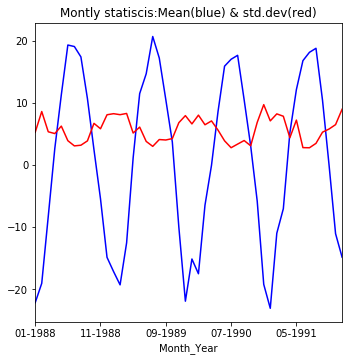

In [28]:
fig=plt.figure(figsize=(5.5,5.5))
ax=fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax,color='b')
monthly_stats['std'].plot(ax=ax,color='r')

ax.set_title('Montly statiscis:Mean(blue) & std.dev(red)')
